In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import report
import pbreport
import calibtools
import icalibtools

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize']=(12,8)
matplotlib.rcParams['legend.fontsize']=20

In [28]:
AMAC='AMAC_B08'

In [29]:
r_amac=report.Report(AMAC)

In [30]:
r_pb=pbreport.Report('PB_'+AMAC)

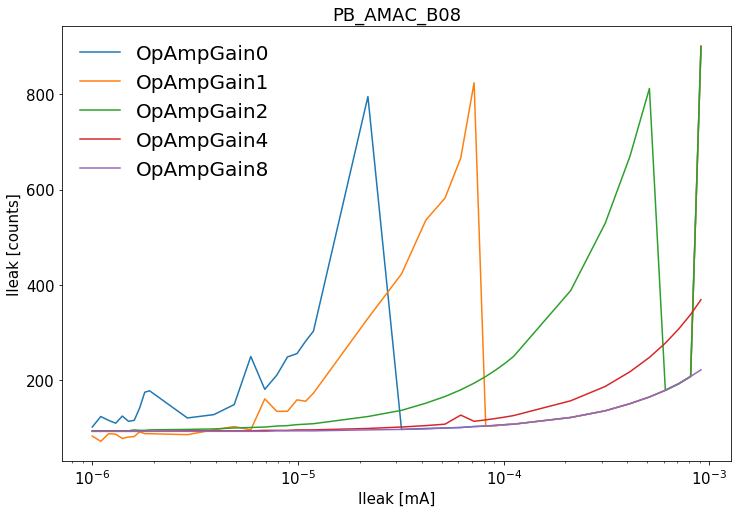

In [31]:
r_pb.render_ileak()

In [32]:
subdata=r_amac.icalib[(r_amac.icalib.Channel=='LEFT')&(r_amac.icalib.BandgapControl==10)&(r_amac.icalib.RampGain==3)]
icalib=icalibtools.calibrate(subdata,True)

In [33]:
icalibtools.plot_calibration(subdata,icalib,None,10,3,0)
icalibtools.plot_calibration(subdata,icalib,None,10,3,1)
icalibtools.plot_calibration(subdata,icalib,None,10,3,2)
icalibtools.plot_calibration(subdata,icalib,None,10,3,4)

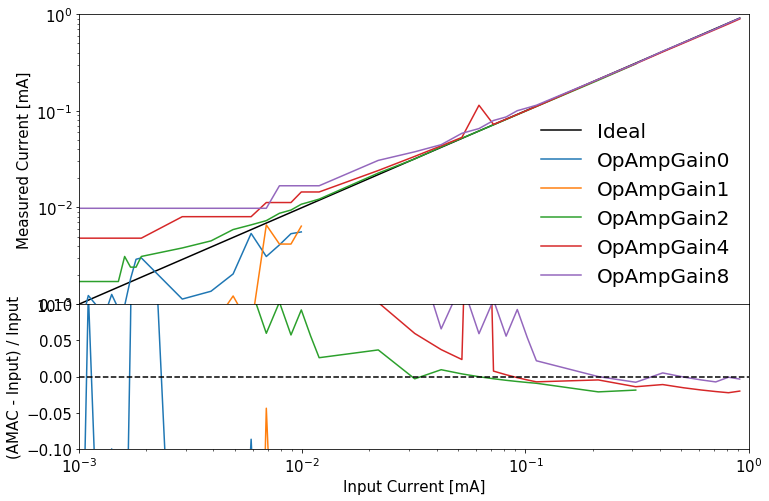

In [41]:
IleakIn=r_pb.ileak.Ileak*1e3

plt.subplots_adjust(hspace=0.,wspace=0.)

# plot the data
plt.subplot2grid((3,3), (0,0), rowspan=2, colspan=3)
plt.loglog(IleakIn,IleakIn,'-k',label='Ideal')

for oa in [0,1,2,4,8]:
    subdata=r_pb.ileak[r_pb.ileak.Ileak<icalibtools.ILIMITS.get(int(oa/2))]
    leak=icalibtools.convert(subdata['OpAmpGain%d'%oa],icalib,BG=10,RG=3,OA=oa,Channel='LEFT')
    plt.loglog(subdata.Ileak*1e3,leak*1e3,'-',label='OpAmpGain%d'%oa)

plt.xlim([1e-3,1])
plt.ylim([1e-3,1])
plt.xticks([])
plt.legend(frameon=False)
plt.ylabel('Measured Current [mA]')
    
# plot the residuals
plt.subplot2grid((3,3), (2,0), rowspan=1, colspan=3)
for oa in [0,1,2,4,8]:
    subdata=r_pb.ileak[r_pb.ileak.Ileak<icalibtools.ILIMITS.get(int(oa/2))]
    leak=icalibtools.convert(subdata['OpAmpGain%d'%oa],icalib,BG=10,RG=3,OA=oa,Channel='LEFT')
    resid=(leak-subdata.Ileak)/subdata.Ileak
    plt.semilogx(subdata.Ileak*1e3,resid,'-',label='OpAmpGain%d'%oa)    
    
plt.semilogx([1e-3,1],[0,0],'--k')    
plt.xlim([1e-3,1])
plt.ylim([-0.1,0.1])
plt.xlabel('Input Current [mA]')
plt.ylabel('(AMAC - Input) / Input')